In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [ ]:
# 꽃 이미지가 저장된 폴더에서 이미지 파일 가져오기 & 라벨링
# X: 꽃 이미지 파일을 numpy 배열로 변환하여 X 배열에 저장
# Z: 꽃 이미지 마다 라벨(꽃 이름)을 영문자열로 Z 배열에 저장

X=[]
Z=[]
IMG_SIZE=224
Garetteok_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/가래떡'
Ganjanggejang_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/간장게장'
Galbijjim_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/갈비찜'
Galbitang_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/갈비탕'
Gamjagook_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/감자국'
Gamjabokum_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/감자볶음'
rkawkxnlrla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/감자튀김'
rlaqkq_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/김밥'
rlaclwjs_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/김치전'
rlacltrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/김칫국'
Rkrenrl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/깍두기'
RotdlvwkddkWl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/깻잎장아찌'
RnfEjr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/꿀떡'
ekfrifrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/달걀국'
ekfrifakfdl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/달걀말이'
ekfrifwkdwhfla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/달걀장조림'
ekfrifWla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/달걀찜(새우)'
ekfrqhRdmaxkd_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/닭볶음탕'
ehxhflanr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/도토리묵'
ehowlrhrltndbr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/돼지고기 수육'
ehowlrhrlwkdwhfla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/돼지고기장조림'
enqnancla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/두부부침'
emdtlaehsRktm_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/등심돈까스'
Ejrrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/떡국'
EjrqhRdl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/떡볶이'
fkaus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/라면'
aksmfwkddkWl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/마늘장아찌'
akrrnrtn_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/막국수'
aksen_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/만두'
aksentrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/만둣국'
aufclqhRdma_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/멸치볶음'
anehlswkdrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/무된장국'
anwlroEjr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/무지개떡'
anfsodaus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/물냉면'
aldurrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/미역국'
qocnrlacl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/배추김치'
qhRdmadnehd_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/볶음우동'
qneoWlro_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/부대찌개'
qlqlarnrtn_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/비빔국수'
qlqlasodaus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/비빔냉면'
Qugowkdrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/뼈해장국'
tkarkrrlaqkq_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/삼각김밥'
tkarPxkd_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/삼계탕'
tothddlqjtjtqhRdma_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/새송이버섯볶음'
todnxnlrla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/새우튀김'
thqnfrhrl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/소불고기'
thtlwlqhRdma_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/소시지볶음'
thlrhrlrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/쇠고기국'
thlrhqckdrndl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/쇠곱창구이'
tnwpql_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/수제비'
tnseornr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/순대국'
tnseoqhRdma_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/순대볶음'
Tkfrnrtn_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/쌀국수'
dksehdWlaekfr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/안동찜닭'
doghqkrqhRdma_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/애호박볶음'
dirrhk_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/약과'
djanrrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/어묵국'
djanrqhRdma_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/어묵볶음'
dusrmswhfla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/연근조림'
dusdj_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/연어'
dufanrlacl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/열무김치'
dhflrhrlrndl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/오리고기구이'
dnehd_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/우동(일식)'
dnfaus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/울면'
dbqnchqkq_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/유부초밥'
dbrghl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/육회'
dlswjfal_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/인절미'
wkwkdaus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/자장면'
wkqco_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/잡채'
wjfvus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/절편'
whrqkf_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/족발'
WkaQhd_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/짬뽕'
Whfaus_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/쫄면'
chqkq_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/초밥, 모듬 초밥'
zkfrnrtn_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/칼국수'
zhdrnrtn_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/콩국수'
zhdskanfrnr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/콩나물국'
zhdskanfancla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/콩나물무침'
zhdwhfla_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/콩조림(콩자반)'
xkdtndbr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/탕수육'
tmvkrpxl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/토마토소스스파게티'
vkxtlfnEjr_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/팥시루떡'
gkaqkrtmxpdlzm_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/함박스테이크'
goarndl_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/햄구이'
gnfkdlemclzls_DIR='/gdrive/My Drive/Colab Notebooks/Project/food/후라이드치킨'


In [ ]:
from tqdm import tqdm
import os
import cv2

# 폴더에 저장된 이미지 파일들을 Numpy 데이터로 변환
def make_train_data(food_type,DIR):
    for img in tqdm(os.listdir(DIR)):
      label = food_type
      path = os.path.join(DIR, img)
      img2 = cv2.imread(path, cv2.IMREAD_COLOR)
      img2 = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))
      X.append(img2)
      Z.append(label)

In [ ]:
make_train_data('Garetteok',Garetteok_DIR)
print(len(X))

make_train_data('Ganjanggejang',Ganjanggejang_DIR)
print(len(X))

make_train_data('Galbijjim',Galbijjim_DIR)
print(len(X))

make_train_data('Galbitang',Galbitang_DIR)
print(len(X))

make_train_data('Gamjagook',Gamjagook_DIR)
print(len(X))

make_train_data('Gamjabokum',Gamjabokum_DIR) #감자볶음
print(len(X))

make_train_data('Gamjatwigim',rkawkxnlrla_DIR) #감자튀김
print(len(X))

make_train_data('kimbab',rlaqkq_DIR) #김밥
print(len(X))

make_train_data('Kimchijeon',rlaclwjs_DIR) #김치전
print(len(X))

make_train_data('Kimchigook',rlacltrnr_DIR) #김칫국
print(len(X))

make_train_data('kkakdugi',Rkrenrl_DIR) #깍두기
print(len(X))

make_train_data('kkaetipjangaajji',RotdlvwkddkWl_DIR) #깻잎장아찌
print(len(X))

make_train_data('kkultteok',RnfEjr_DIR) #꿀떡
print(len(X))

make_train_data('dalgalgook',ekfrifrnr_DIR) #달걀국
print(len(X))

make_train_data('dalgalmali',ekfrifakfdl_DIR) #달걀말이
print(len(X))

make_train_data('dalgaljangjorim',ekfrifwkdwhfla_DIR) #달걀장조림
print(len(X))

make_train_data('dalgaljjim',ekfrifWla_DIR) #달걀찜
print(len(X))

make_train_data('dalgbokkumtang',ekfrqhRdmaxkd_DIR) #닭볶음탕
print(len(X))

make_train_data('dotorimook',ehxhflanr_DIR) #도토리묵
print(len(X))

make_train_data('daejigogi_soyook',ehowlrhrltndbr_DIR) #돼지고기 수육
print(len(X))

make_train_data('daejigogijangjorim',ehowlrhrlwkdwhfla_DIR) #돼지고기장조림
print(len(X))

make_train_data('dobobochim',enqnancla_DIR) #두부부침
print(len(X))

make_train_data('deungsimdongga',emdtlaehsRktm_DIR) #등심돈까스
print(len(X))

make_train_data('kkultteok',Ejrrnr_DIR) #떡국
print(len(X))

make_train_data('kkultteok',EjrqhRdl_DIR) #떡볶이
print(len(X))

make_train_data('kkultteok',fkaus_DIR) #라면
print(len(X))

make_train_data('maneuljangajji',aksmfwkddkWl_DIR) #마늘장아찌
print(len(X))

make_train_data('maggugsu',akrrnrtn_DIR) #막국수
print(len(X))

make_train_data('mandu',aksen_DIR) #만두
print(len(X))

make_train_data('mandusgug',aksentrnr_DIR) #만둣국
print(len(X))

make_train_data('myeolchibokkeum',aufclqhRdma_DIR) #멸치볶음
print(len(X))

make_train_data('mudoenjangguk',anehlswkdrnr_DIR) #무된장국
print(len(X))

make_train_data('mujigaetteok',anwlroEjr_DIR) #무지개떡
print(len(X))

make_train_data('mulnaengmyeon',anfsodaus_DIR) #물냉면
print(len(X))

make_train_data('miyeokgook',aldurrnr_DIR) #미역국
print(len(X))

make_train_data('baechukimchi',qocnrlacl_DIR) #배추김치
print(len(X))

make_train_data('bokkeumudong',qhRdmadnehd_DIR) #볶음우동
print(len(X))

make_train_data('budaejjigae',qneoWlro_DIR) #부대찌개
print(len(X))

make_train_data('bibimguksu',qlqlarnrtn_DIR) #비빔국수
print(len(X))

make_train_data('bibimnaengmyeon',qlqlasodaus_DIR) #비빔냉면
print(len(X))

make_train_data('ppyeohaejangguk',Qugowkdrnr_DIR) #뼈해장국
print(len(X))

make_train_data('samgakkimbab',tkarkrrlaqkq_DIR) #삼각김밥
print(len(X))

make_train_data('samgyetang',tkarPxkd_DIR) #삼계탕
print(len(X))

make_train_data('saesongibeoseosbokkeum',tothddlqjtjtqhRdma_DIR) #새송이버섯볶음
print(len(X))

make_train_data('saeutwigim',todnxnlrla_DIR) #새우튀김
print(len(X))

make_train_data('sobulgogi',thqnfrhrl_DIR) #소불고기
print(len(X))

make_train_data('sosijibokkum',thtlwlqhRdma_DIR) #소시지볶음
print(len(X))

make_train_data('soegogiguk',thlrhrlrnr_DIR) #쇠고기국
print(len(X))

make_train_data('soegobchanggui',thlrhqckdrndl_DIR) #쇠곱창구이
print(len(X))

make_train_data('sujaebi',tnwpql_DIR) #수제비
print(len(X))

make_train_data('soondaegook',tnseornr_DIR) #순대국
print(len(X))

make_train_data('soondaebokkum',tnseoqhRdma_DIR) #순대볶음
print(len(X))

make_train_data('ssalgooksu',Tkfrnrtn_DIR) #쌀국수
print(len(X))

make_train_data('andongjjimdalg',dksehdWlaekfr_DIR) #안동찜닭
print(len(X))

make_train_data('aehobakbokkeum',doghqkrqhRdma_DIR) #애호박볶음
print(len(X))

make_train_data('yakgwa',dirrhk_DIR) #약과
print(len(X))

make_train_data('eomukgook',djanrrnr_DIR) #어묵국
print(len(X))

make_train_data('eomukbokkeum',djanrqhRdma_DIR) #어묵볶음
print(len(X))

make_train_data('yeongeunjolim',dusrmswhfla_DIR) #연근조림
print(len(X))

make_train_data('yoeneo',dusdj_DIR) #연어
print(len(X))

make_train_data('yeolmukimchi',dufanrlacl_DIR) #열무김치
print(len(X))

make_train_data('oligogigui',dhflrhrlrndl_DIR) #오리고기구이
print(len(X))

make_train_data('udong',dnehd_DIR) #우동
print(len(X))

make_train_data('ulmyeon',dnfaus_DIR) #울면
print(len(X))

make_train_data('yubuchobab',dbqnchqkq_DIR) #유부초밥
print(len(X))

make_train_data('yukhoe',dbrghl_DIR) #육회
print(len(X))

make_train_data('injeolmi',dlswjfal_DIR) #인절미
print(len(X))

make_train_data('jajangmyeon',wkwkdaus_DIR) #자장면
print(len(X))

make_train_data('jabchae',wkqco_DIR) #잡채
print(len(X))

make_train_data('jeolpyeon',wjfvus_DIR) #절편
print(len(X))

make_train_data('jokbal',whrqkf_DIR) #족발
print(len(X))

make_train_data('jjambbong',WkaQhd_DIR) #짬뽕
print(len(X))

make_train_data('jjolmyeon',Whfaus_DIR) #쫄면
print(len(X))

make_train_data('chobab',chqkq_DIR) #초밥
print(len(X))

make_train_data('kalguksu',zkfrnrtn_DIR) #칼국수
print(len(X))

make_train_data('kongguksu',zhdrnrtn_DIR) #콩국수
print(len(X))

make_train_data('kongnamulgook',zhdskanfrnr_DIR) #콩나물국
print(len(X))

make_train_data('kongnamulmuchim',zhdskanfancla_DIR) #콩나물무침
print(len(X))

make_train_data('kongjorim',zhdwhfla_DIR) #콩조림
print(len(X))

make_train_data('tangsuyook',xkdtndbr_DIR) #탕수육
print(len(X))

make_train_data('tomatososeuseupagaeti',tmvkrpxl_DIR) #토마토소스스파게티
print(len(X))

make_train_data('patsirutteok',vkxtlfnEjr_DIR) #팥시루떡
print(len(X))

make_train_data('hambakseutaeikeu',gkaqkrtmxpdlzm_DIR) #함박스테이크
print(len(X))

make_train_data('hamgui',goarndl_DIR) #햄구이
print(len(X))

make_train_data('fried_chicken',gnfkdlemclzls_DIR) #후라이드치킨
print(len(X))


100%|██████████| 50/50 [00:07<00:00,  6.51it/s]


50


100%|██████████| 50/50 [00:06<00:00,  7.21it/s]


100


100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


150


100%|██████████| 50/50 [00:07<00:00,  7.09it/s]


200


100%|██████████| 50/50 [00:07<00:00,  6.48it/s]

250


In [ ]:
# Z 배열에 저장된 꽃 이름(문자열)을 원핫인코딩 방식으로 변환하여 Y 배열에 저장
# X 배열에 저장된 꽃 이미지는 모든 값을 255로 나누어줌
# 입력 값을 1보다 작은 값으로 만들기 위함

le = LabelEncoder()
tmp = le.fit_transform(Z)
Y = pd.get_dummies(tmp).values

X=np.array(X)
X = X/255.0

In [ ]:
# 1. 데이터 준비: 훈련 데이터와 시험 데이터로 분할하기
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((200, 224, 224, 3), (50, 224, 224, 3), (200, 5), (50, 5))

In [ ]:
'''
# 2. 모델 구성하기(AlexNet 구성)
img_shape = (IMG_SIZE, IMG_SIZE, 3)

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape=img_shape, kernel_size=(11, 11), strides=4, padding='same', activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1,
                 padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1,
                 padding='same', activation='relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 4th Convolutional Layer
model.add(Conv2D(filters=284, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(2048, activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(1024, activation='relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(5, activation='softmax'))

model.summary()
'''

# 2-1. 모델 구성하기(컨볼루션 네트워크인 상단부는 InceptionV3 네트워크 모델 사용)

# 케라스에서 제공하는 InceptionV3 네트워크 모델 사용하기
# include_top=False: 이미지를 분류하는 Flatten 레이어부터 Dense레이어까지는 포함하지 않음
# weights='imagenet': ImageNeub
in_s = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=in_s)
inception_model.trainable = False

inception_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                      

In [ ]:
# 2-2. 모델 구성하기(이미지 분류 레이어 추가하기)

# InceptionV3 네트워크 모델의 이미지 분류 레이어 추가하기

model = Sequential()

# 이미지의 특징을 추출하는 컨볼루션 레이어는 InceptionV3 모델을 사용
model.add(inception_model)

# Flatten 레이어 추가
model.add(Flatten())

# 이미지 분류를 위한 Dense 레이어 추가
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 4. 모델 학습시키기
# 이미지 데이터 증폭을 위한 설정
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)
hist = model.fit(datagen.flow(x_train, y_train), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
7/7 [==============================] - 37s 592ms/step - loss: 1.9739 - accuracy: 0.3250 - val_loss: 23.2520 - val_accuracy: 0.2800
Epoch 2/50
7/7 [==============================] - 2s 330ms/step - loss: 1.6153 - accuracy: 0.4400 - val_loss: 90.7963 - val_accuracy: 0.2800
Epoch 3/50
7/7 [==============================] - 2s 337ms/step - loss: 1.7159 - accuracy: 0.4300 - val_loss: 79.3479 - val_accuracy: 0.2800
Epoch 4/50
7/7 [==============================] - 2s 325ms/step - loss: 1.7011 - accuracy: 0.4450 - val_loss: 54.5214 - val_accuracy: 0.1600
Epoch 5/50
7/7 [==============================] - 2s 342ms/step - loss: 1.5174 - accuracy: 0.4500 - val_loss: 73.1662 - val_accuracy: 0.1200
Epoch 6/50
7/7 [==============================] - 2s 341ms/step - loss: 1.6463 - accuracy: 0.4850 - val_loss: 61.2955 - val_accuracy: 0.1400
Epoch 7/50
7/7 [==============================] - 2s 335ms/step - loss: 1.4751 - accuracy: 0.5000 - val_loss: 141.2552 - val_accuracy: 0.1200
Epoch 8/50


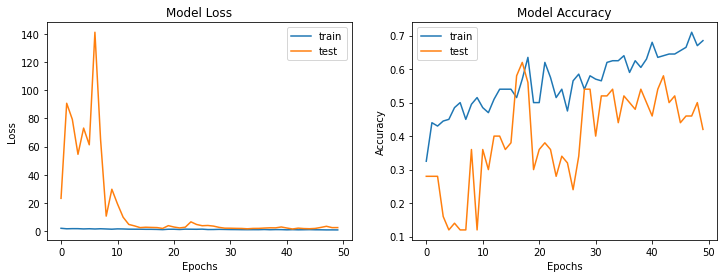

In [ ]:
# 5. 학습과정 살펴보기
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# 6. 학습된 모델 성능 평가하기
model.evaluate(x_test, y_test)

# 6. 학습된 모델로 예측하기
pred=model.predict(x_test)
pred_num = np.argmax(pred, axis=1)
pred_num

array([3, 4, 4, 1, 4, 4, 3, 4, 1, 4, 2, 1, 4, 1, 4, 1, 0, 3, 4, 1, 2, 4,
       3, 4, 4, 3, 4, 4, 0, 4, 4, 4, 3, 4, 1, 2, 4, 1, 2, 0, 3, 4, 3, 4,
       1, 4, 2, 4, 0, 4])

In [ ]:
# 예측결과 올바른 결과 8개(prop_class)와 틀린 결과 8개(mis_class) 선택
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
  if(np.argmax(y_test[i] == pred_num[i])):
    prop_class.append(i)
  if(len(prop_class) == 8):
    break

i = 0
for i in range(len(y_test)):
  if(not np.argmax(y_test[i] == pred_num[i])):
    mis_class.append(i)
  if(len(mis_class) == 8):
    break

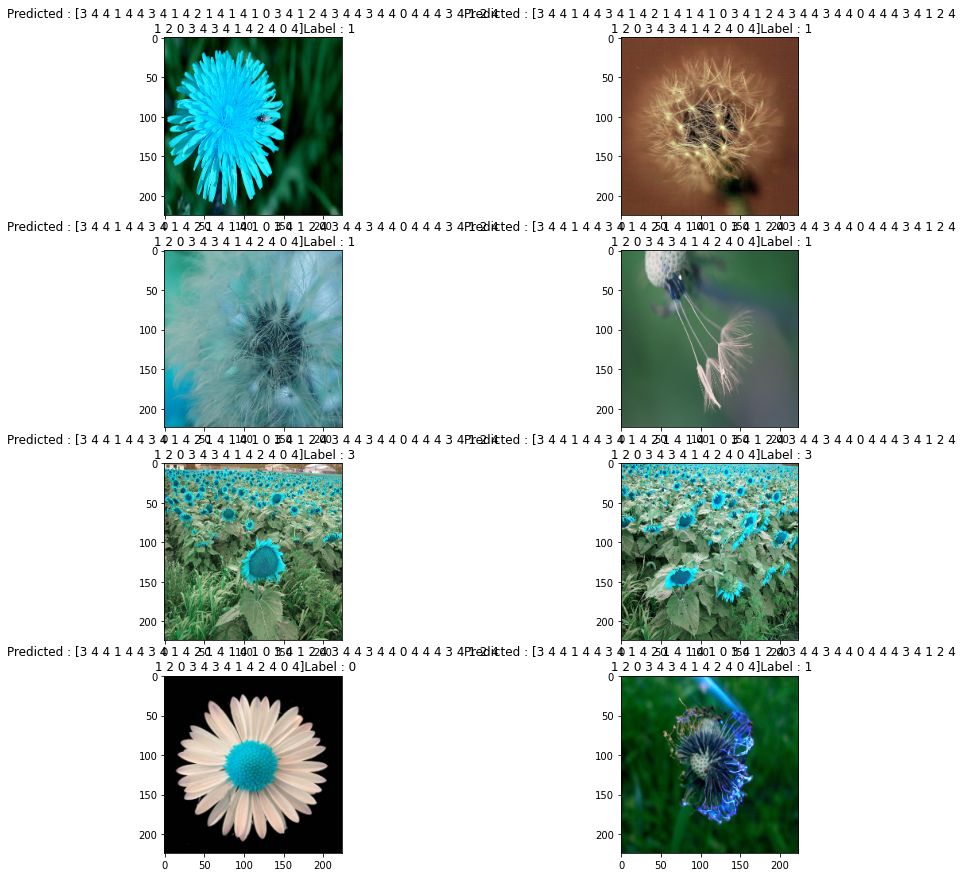

In [ ]:
# 올바른 예측 결과 보여주기

count = 0
fig, ax=plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
  for j in range(2):
    ax[i, j].imshow(x_test[prop_class[count]])
    ax[i, j].set_title("Predicted : " + str(pred_num) + "Label : " + str(np.argmax([y_test[prop_class[count]]])))
    count += 1

plt.show()

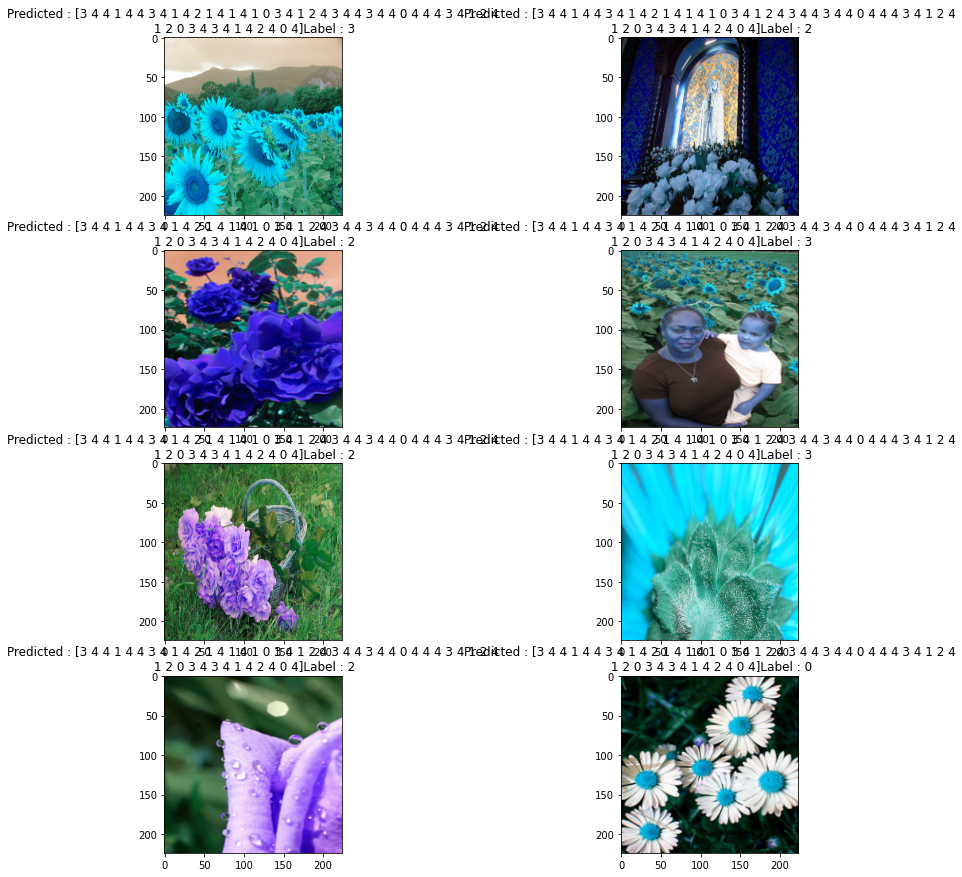

In [ ]:
# 잘못된 결과 보여주기

count = 0
fig, ax=plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
  for j in range(2):
    ax[i, j].imshow(x_test[mis_class[count]])
    ax[i, j].set_title("Predicted : " + str(pred_num) + "Label : " + str(np.argmax([y_test[mis_class[count]]])))
    count += 1

plt.show()

In [ ]:
# 7. 학습된 모델로 예측하기
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==12):
        break

count=0
fig,ax=plt.subplots(4,3)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (3):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted: " + str(pred_digits[prop_class[count]]) + ", Actual: " + str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1

In [ ]:
# 8. 인터넷에서 다운로드 받은 이미지로 모델 예측 결과 확인하기
import cv2

flower = plt.imread("/gdrive/My Drive/rose.jpg")

plt.show(flower)